In [87]:
# AI20BTECH11025
import numpy as np
import matplotlib.pyplot as plt
import random

In [88]:
board_size = 3
class Tictactoe():
    def __init__(self, n):
        self.size = n
        self.board = np.zeros((n,n), dtype='U1')
        self.player = random.choice(['x', 'o'])
        self.end = False

    def act(self, pos):
        if self.board[pos] == '' :
            self.board[pos] = self.player
            self.player = 'x' if self.player == 'o' else 'o'
        else : 
            print('Move is invalid')
     
    def print_board(self):
        print(self.board[0,0], ' | ',self.board[0,1], ' | ',self.board[0,2])
        print('-----------')
        print(self.board[1,0], ' | ',self.board[1,1], ' | ',self.board[1,2])
        print('------------')
        print(self.board[2,0], ' | ',self.board[2,1], ' | ',self.board[2,2])        
    
    def state(self):
        return str(self.board.reshape(self.size * self.size))

    def availablepositions(self):
        positions = []
        for i in range(self.size):
            for j in range(self.size):
                if self.board[i, j] == '': 
                    positions.append((i, j))
        return positions

    def checkwinner(self):
        # Along any row
        for i in range(self.size):
            if sum(np.char.count(self.board[i, :], 'x')) == self.size:
                self.end = True
                return 'x'
            if sum(np.char.count(self.board[i, :], 'o')) == self.size:
                self.end = True
                return 'o'
        
        # Along any column
        for i in range(self.size):
            if sum(np.char.count(self.board[:, i], 'x')) == self.size:
                self.end = True
                return 'x'
            if sum(np.char.count(self.board[:, i], 'o')) == self.size:
                self.end = True
                return 'o'

        # Along any diagonal
        if sum(np.char.count(self.board.diagonal(), 'x')) == self.size:
              self.end = True
              return 'x'
        if sum(np.char.count(self.board.diagonal(), 'o')) == self.size:
              self.end = True
              return 'o'
        if sum(np.char.count((self.board[::-1]).diagonal(), 'x')) == self.size:
              self.end = True
              return 'x'
        if sum(np.char.count((self.board[::-1]).diagonal(), 'o')) == self.size:
              self.end = True
              return 'o'
            
        # Tie : No available positions
        if len(self.availablepositions()) == 0: 
              self.end = True
              return 0

        # If any moves available
        self.end = False
        return -1

    def reward(self):
        if self.checkwinner() == 'x':
            return 1
        if self.checkwinner() == 'o':
            return -1
        if self.checkwinner() == -1:
            return 0.5
        return 0

In [89]:
class RandomAgent():

    def __init__(self):
        pass
    
    def policy(self, env):
        positions = env.availablepositions()
        return random.choice(positions)

In [90]:
class SafeAgent():

    def __init__(self):
        pass
    
    def policy(self, env):
        positions = env.availablepositions()
        
        # Win along any row
        for i in range(env.size):
            if sum(np.char.count(env.board[i, :], 'x')) == env.size - 1 and sum(np.char.count(env.board[i, :], 'o')) == 0:
                for j in range(env.size):
                    if env.board[i, j] == '': 
                        return (i, j)

        # Win along any column
        for i in range(env.size):
            if sum(np.char.count(env.board[:, i], 'x')) == env.size - 1 and sum(np.char.count(env.board[:, i], 'o')) == 0:
                for j in range(env.size):
                    if env.board[j, i] == '': 
                        return (j, i)

        # Win along any diagonal
        if sum(np.char.count(env.board.diagonal(), 'x')) == env.size - 1 and sum(np.char.count(env.board.diagonal(), 'o')) == 0:
            for i in range(env.size):
                if env.board[i, i] == '':
                    return (i, i)

        if sum(np.char.count((env.board[::-1]).diagonal(), 'x')) == env.size - 1 and sum(np.char.count((env.board[::-1]).diagonal(), 'o')) == 0:
            for i in range(env.size):
                if env.board[i, env.size - 1 - i] == '':
                    return (i, env.size - 1 - i)


        # Block along any row
        for i in range(env.size):
            if sum(np.char.count(env.board[i, :], 'o')) == env.size - 1 and sum(np.char.count(env.board[i, :], 'x')) == 0:
                for j in range(env.size):
                    if env.board[i, j] == '': 
                        return (i, j)

        # Block along any column
        for i in range(env.size):
            if sum(np.char.count(env.board[:, i], 'o')) == env.size - 1 and sum(np.char.count(env.board[:, i], 'x')) == 0:
                for j in range(env.size):
                    if env.board[j, i] == '': 
                        return (j, i)

        # Block along any diagonal
        if sum(np.char.count(env.board.diagonal(), 'o')) == env.size - 1 and sum(np.char.count(env.board.diagonal(), 'x')) == 0:
            for i in range(env.size):
                if env.board[i, i] == '':
                    return (i, i)

        if sum(np.char.count((env.board[::-1]).diagonal(), 'o')) == env.size - 1 and sum(np.char.count((env.board[::-1]).diagonal(), 'x')) == 0:
            for i in range(env.size):
                if env.board[i, env.size - 1 - i] == '':
                    return (i, env.size - 1 - i)

        # No available safe moves
        # Pick a random action
        positions = env.availablepositions()
        return random.choice(positions)

In [91]:
class QAgent():

    def __init__(self):
        self.alpha = 0.01
        self.gamma = 0.9
        self.epsilon = 0.05
        self.Q_table = {}

    def policy(self, env):
        p = random.random()
        actions = env.availablepositions()
        s = env.state()

        # With a probability of epsilon take a random action
        if p <= self.epsilon :   
            action = random.choice(actions)
            
        else:
            max_Q_val = -1000000
            for a in actions:
                # Greedy action: Choose that action which has the max Q(s, a)
                if self.Q(s, a) > max_Q_val :
                    max_Q_val = self.Q(s, a)
                    action = a
      
        return action

    def Q(self, s, a):
        # Check if Q(s, a) is in the Q table
        # If yes, return it's value
        # Else, initialize it to 0
        if (s, a) in self.Q_table: 
            Q_val = self.Q_table[(s, a)]
        else :
            self.Q_table[(s, a)] = 0
            Q_val = 0
        
        return Q_val         

    def Q_update(self, env, s1, a1, s2):
        actions = env.availablepositions()
        r1 = env.reward()

        # max_Q_val = 0
        max_Q_val = max([self.Q(s2, a) for a in actions])

        temp = self.Q(s1, a1)
        self.Q_table[(s1, a1)] = self.Q_table[(s1, a1)] + self.alpha*(r1 + self.gamma*max_Q_val - self.Q_table[(s1, a1)])              

In [92]:
def train(agent, opponents):
    num_games = 10000
    opponent = random.choice(opponents)
    train_wins = []
    for i in range(num_games):
        env = Tictactoe(board_size)
        if(env.player == 'x'):
            first_player = agent
            second_player = opponent
        else:
            first_player = opponent
            second_player = agent

        while(env.end == False):
            s1 = env.state()
            a_p1 = first_player.policy(env)
            env.act(a_p1)

            winner = env.checkwinner()
            if winner == -1:
                a_p2 = second_player.policy(env)
                env.act(a_p2)
                a1 = a_p1 if first_player == agent else a_p2
                s2 = env.state()

                agent.Q_update(env, s1, a1, s2)
                winner = env.checkwinner()
        
        if(i % 200 == 0):
              win_count = test(agent, opponent, 100)
              print('Epoch #',i/200)
              print('Wins = ', win_count)
              print('-------------------------------------------------------------')
              train_wins.append(win_count)

    return agent, train_wins        

In [93]:
def test(greedy_agent, opponent, num_games):
    num_wins = 0
    for i in range(num_games):
        env = Tictactoe(board_size)
        greedy_agent = QAgent()
        greedy_agent.epsilon = 0
        greedy_agent.Q_table = agent.Q_table

        if(env.player == 'x'):
            first_player = greedy_agent
            second_player = opponent
        else:
            first_player = opponent
            second_player = greedy_agent

        while(env.end == False):
            env.act(first_player.policy(env))

            winner = env.checkwinner()
            if winner == -1:
                env.act(second_player.policy(env))
                winner = env.checkwinner()
        
        if (env.checkwinner() == 'x'): num_wins += 1

    return num_wins

# (1) Training is done only against the random player. But the learnt Q-table is tested against both random and safe player.

Training against Random Agent
Epoch # 0.0
Wins =  53
-------------------------------------------------------------
Epoch # 1.0
Wins =  61
-------------------------------------------------------------
Epoch # 2.0
Wins =  67
-------------------------------------------------------------
Epoch # 3.0
Wins =  64
-------------------------------------------------------------
Epoch # 4.0
Wins =  61
-------------------------------------------------------------
Epoch # 5.0
Wins =  62
-------------------------------------------------------------
Epoch # 6.0
Wins =  67
-------------------------------------------------------------
Epoch # 7.0
Wins =  62
-------------------------------------------------------------
Epoch # 8.0
Wins =  58
-------------------------------------------------------------
Epoch # 9.0
Wins =  55
-------------------------------------------------------------
Epoch # 10.0
Wins =  70
-------------------------------------------------------------
Epoch # 11.0
Wins =  57
----------

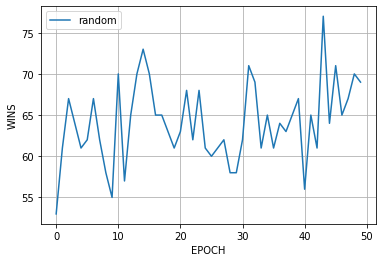

Wins against Random agent:  680
Wins against Safe agent:  178


In [104]:
# Initialising an environment
env = Tictactoe(board_size)

# Train against random player
print("Training against Random Agent")
random_opponent = RandomAgent()
agent = QAgent()
agent, wins_array1 = train(agent, [random_opponent])

epochs = np.arange(0,50)
plt.plot(epochs, wins_array1, label = "random")
plt.xlabel("EPOCH")
plt.ylabel("WINS")
plt.grid(True)
plt.legend()
plt.show()

# Testing with Random Agent
random_agent_test = RandomAgent()
win_count = 0
for i in range(1000):
    win_count += test(agent, random_agent_test, 1)

print('Wins against Random agent: ', win_count)

# Testing with Safe Agent
safe_agent_test = SafeAgent()
win_count = 0
for i in range(1000):
    win_count += test(agent, safe_agent_test, 1)

print('Wins against Safe agent: ', win_count)

# (2) Training is done only against the safe player. But the learnt Q-table is tested against both random and safe player

Training against Safe Agent
Epoch # 0.0
Wins =  18
-------------------------------------------------------------
Epoch # 1.0
Wins =  19
-------------------------------------------------------------
Epoch # 2.0
Wins =  26
-------------------------------------------------------------
Epoch # 3.0
Wins =  26
-------------------------------------------------------------
Epoch # 4.0
Wins =  17
-------------------------------------------------------------
Epoch # 5.0
Wins =  26
-------------------------------------------------------------
Epoch # 6.0
Wins =  22
-------------------------------------------------------------
Epoch # 7.0
Wins =  15
-------------------------------------------------------------
Epoch # 8.0
Wins =  27
-------------------------------------------------------------
Epoch # 9.0
Wins =  25
-------------------------------------------------------------
Epoch # 10.0
Wins =  20
-------------------------------------------------------------
Epoch # 11.0
Wins =  19
------------

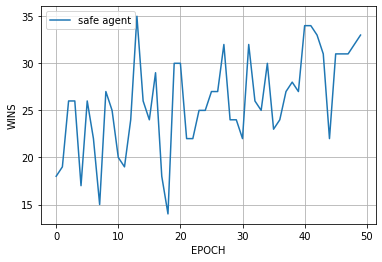

Wins against Random agent:  543
Wins against Safe agent:  272


In [118]:
# Initialising an environment
env = Tictactoe(board_size)

# Train against Safe player
print("Training against Safe Agent")
safe_opponent = SafeAgent()
agent = QAgent()
agent, wins_array2 = train(agent, [safe_opponent])

plt.plot(epochs, wins_array2, label = "safe agent")
plt.xlabel("EPOCH")
plt.ylabel("WINS")
plt.grid(True)
plt.legend()
plt.show()


# Testing with Random Agent
random_agent_test = RandomAgent()
win_count = 0
for i in range(1000):
    win_count += test(agent, random_agent_test, 1)

print('Wins against Random agent: ', win_count)

# Testing with Safe Agent
safe_agent_test = SafeAgent()
win_count = 0
for i in range(1000):
    win_count += test(agent, safe_agent_test, 1)

print('Wins against Safe agent: ', win_count)

# (3) In every game of training, we randomly select our opponent. The learnt Q-table is tested against both random and safe player.

Training against Safe Agent
Epoch # 0.0
Wins =  57
-------------------------------------------------------------
Epoch # 1.0
Wins =  66
-------------------------------------------------------------
Epoch # 2.0
Wins =  55
-------------------------------------------------------------
Epoch # 3.0
Wins =  64
-------------------------------------------------------------
Epoch # 4.0
Wins =  63
-------------------------------------------------------------
Epoch # 5.0
Wins =  64
-------------------------------------------------------------
Epoch # 6.0
Wins =  66
-------------------------------------------------------------
Epoch # 7.0
Wins =  61
-------------------------------------------------------------
Epoch # 8.0
Wins =  66
-------------------------------------------------------------
Epoch # 9.0
Wins =  63
-------------------------------------------------------------
Epoch # 10.0
Wins =  65
-------------------------------------------------------------
Epoch # 11.0
Wins =  63
------------

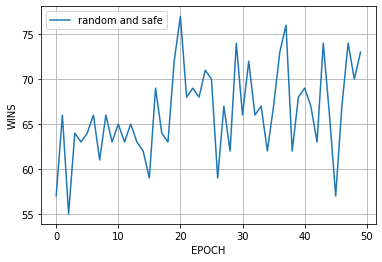

Wins against Random agent:  688
Wins against Safe agent:  259


In [127]:
# Initialising an environment
env = Tictactoe(board_size)

# Train against random player
print("Training against Safe Agent")
random_opponent = RandomAgent()
safe_opponent = SafeAgent()
agent = QAgent()
agent, wins_array3 = train(agent, [random_opponent, safe_opponent])

epochs = np.arange(0,50)
plt.plot(epochs, wins_array3, label = "random and safe")
plt.xlabel("EPOCH")
plt.ylabel("WINS")
plt.grid(True)
plt.legend()
plt.show()

# Testing with Random Agent
random_agent_test = RandomAgent()
win_count = 0
for i in range(1000):
    win_count += test(agent, random_agent_test, 1)

print('Wins against Random agent: ', win_count)

# Testing with Safe Agent
safe_agent_test = SafeAgent()
win_count = 0
for i in range(1000):
    win_count += test(agent, safe_agent_test, 1)

print('Wins against Safe agent: ', win_count)

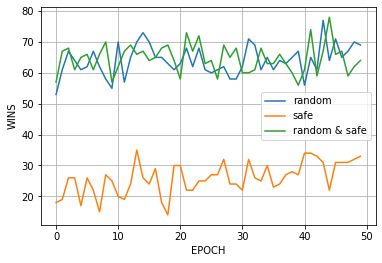

In [121]:
plt.plot(epochs, wins_array1, label = "random")
plt.plot(epochs, wins_array2, label = "safe")
plt.plot(epochs, wins_array3, label = "random & safe")
plt.xlabel("EPOCH")
plt.ylabel("WINS")
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
# (4) The third agent which is trained by both random and safe agent is more better than that trained by either one of them
# It is exposed to opponents which change every game, (thus a different setting) which help it become robust

In [ ]:
# (5) We can find that the Q learning agent improves it's performance with epochs
# But it surely is not unbeatable
# It can be improved by further increasing the epochs and also tuning the hyperparameters